In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn import neighbors
from sklearn.metrics import auc, roc_curve, accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns #Using this for visualisation
# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("winequality-red.csv", sep = ";")
print(df.isnull().head()) # check for missing values (This is part of our CW req)

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0          False             False        False  ...      False    False    False
1          False             False        False  ...      False    False    False
2          False             False        False  ...      False    False    False
3          False             False        False  ...      False    False    False
4          False             False        False  ...      False    False    False

[5 rows x 12 columns]


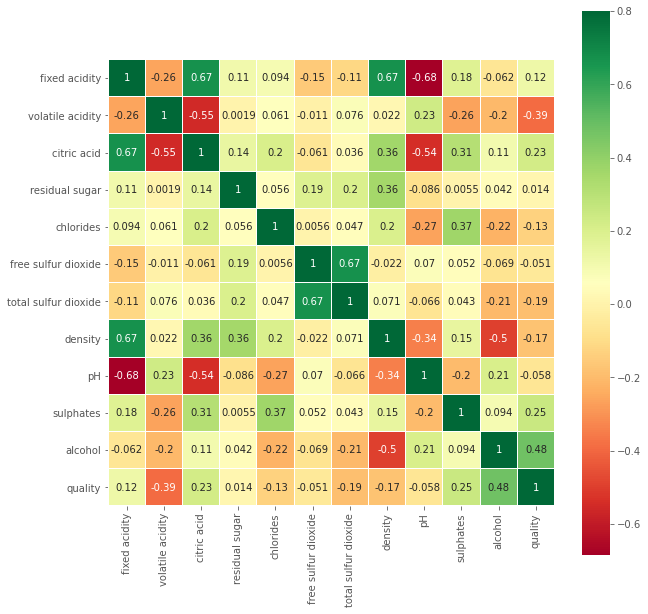

In [3]:
corr = df.corr() #correlation dataframe
# import seaborn as sns to show matrix
plt.figure(figsize = (10,10))
sns.heatmap(corr, vmax = .8, linewidths = 0.01, square = True, annot = True, cmap = 'RdYlGn', linecolor = 'white')
plt.show()

In [0]:
# Assign the independent  variables to X
X = df.loc[:, 'fixed acidity':'alcohol']
feature_names = X.columns.values 

# converting the dependent variable from numeric to categorical
def score_to_label(x):
    if x > 5:
        return 1
    else:
        return 0
        
# replacing the numeric 'quality' with categorical 'label'
df.quality = df.quality.apply(score_to_label)
df.quality, class_names = pd.factorize(df.quality)
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# scaling the numeric attributes
# from sklearn.preprocessingimport StandardScaler
scaler = StandardScaler().fit(X_train)
# scaled X
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [5]:
# k-nearest neighbors
knn_clf = neighbors.KNeighborsClassifier(10, weights = "distance")
knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)

# metrics and ROC curve
knn_acc = accuracy_score(y_test, knn_y_pred)
print(knn_acc)

0.7729166666666667
